In [43]:
import requests
from IPython.display import Image, display
# Note you will need to generate your own keys from
import keys as KEY

# https://epic.gsfc.nasa.gov/about/api
# https://docs.openaq.org/reference/introduction-1

# NASA

In [44]:
link = "https://api.nasa.gov/EPIC/archive\
/natural/2019/05/30/png/\
epic_1b_20190530011359.png"



response = requests.get(f"{link}?api_key={KEY.nasa_key}")


AttributeError: module 'keys' has no attribute 'nasa_key'

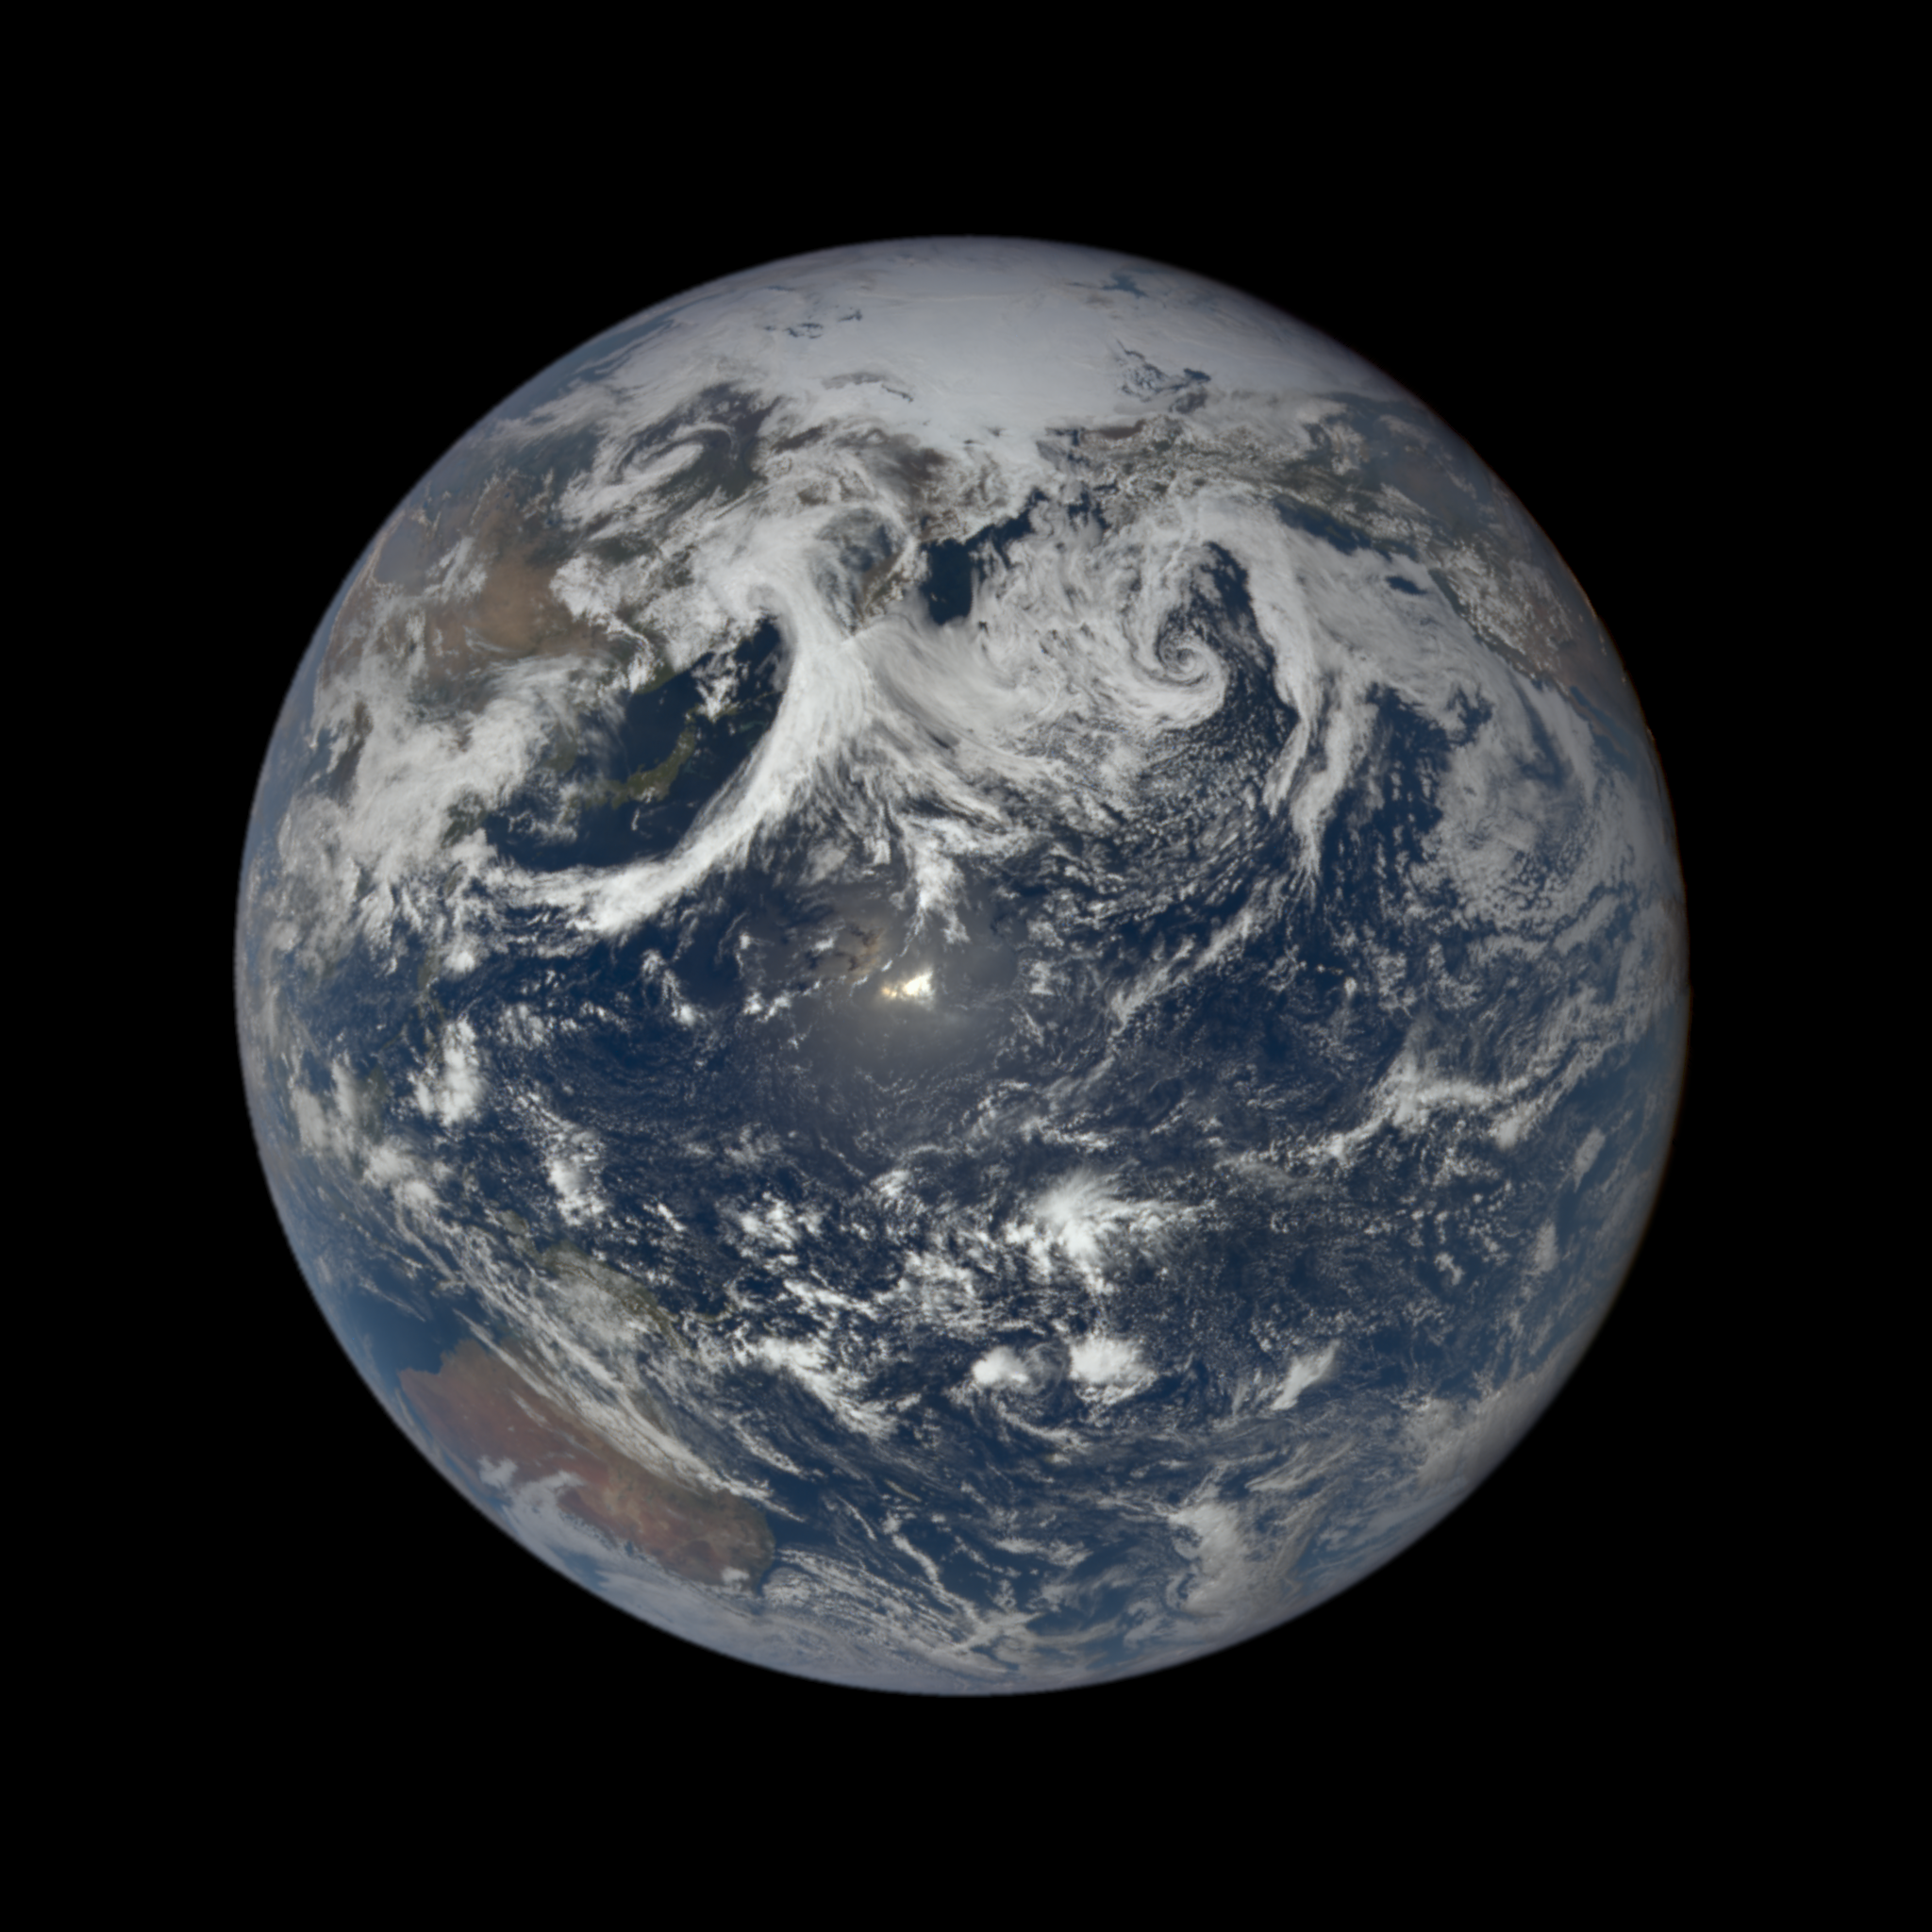

In [23]:
display(Image(response.content))

# OPENAQ

In [45]:
res = requests.get("https://api.openaq.org/v2/latest",
                   headers={"X-API-Key": KEY.openaq_key},
                   params={"coordinates":"-33.8688,151.2093",
                           "parameter": "pm25", "radius": 20000})

In [46]:
data = res.json()
latitudes = [entry['coordinates']['latitude'] for entry in data['results']]
longitudes = [entry['coordinates']['longitude'] for entry in data['results']]


In [47]:
import plotly.graph_objects as go

# Create a scatter plot using Plotly
fig = go.Figure(go.Scattermapbox(
    lat=latitudes,
    lon=longitudes,
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=5,
    ),
))

# Update the layout of the map
fig.update_layout(
    mapbox=dict(
        style='carto-positron',  # You can choose different map styles: 'carto-positron', 'carto-darkmatter', etc.
        center=dict(lat=-33.8688, lon=151.2093),
        zoom=8
    ),
   height=500,  
    width=500,
  margin=go.layout.Margin(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=0  #top margin
    )
)

fig.show()

# Randomuser

Name: Mr Eckard Beermann
Country: Germany
Email: eckard.beermann@example.com
Age: 23


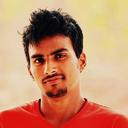

In [41]:
res = requests.get("https://randomuser.me/api/")
data = res.json()

user_data = data['results'][0]  # Assuming there's only one user in the 'results' list
name = f"{user_data['name']['title']} {user_data['name']['first']} {user_data['name']['last']}"
country = user_data['location']['country']
email = user_data['email']
age = user_data['dob']['age']
thumbnail_picture_url = user_data['picture']['large']

print("Name:", name)
print("Country:", country)
print("Email:", email)
print("Age:", age)
display(Image(thumbnail_picture_url))